# Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Data Integration

In [3]:
# sorting data & predictors
db = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
db.drop_duplicates(inplace = True)

In [4]:
db = db[db["Diabetes_012"] != 1] # drop prediabetes
db['Diabetes_012'] = db['Diabetes_012'].replace(2,1)

i_keep_0 = db[db['Diabetes_012'] == 0].sample(n = db['Diabetes_012'].value_counts()[1],
                                   replace=False,
                                   random_state = 1).index

i_keep_all = db[db['Diabetes_012'] == 1].index.append(i_keep_0).sort_values()

db = db.loc[i_keep_all].reset_index(drop=True)

In [5]:
# subsetting predictors
db_main = db[['Diabetes_012', 'BMI', 'HighBP', 'HighChol', 'Sex', 'Age']]

# Model Building

In [6]:
x = db_main.drop('Diabetes_012', axis = 1)

scaler = MinMaxScaler(feature_range = (0, 1))
xresc = scaler.fit_transform(x)
x = pd.DataFrame(data = xresc, columns = x.columns)

y = db_main['Diabetes_012']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [7]:
rf_clf = RandomForestClassifier(n_estimators = 165, criterion = 'entropy',
                                min_samples_split = 18, random_state = 1)
rf_clf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', min_samples_split=18,
                       n_estimators=165, random_state=1)

In [8]:
pred = rf_clf.predict(xtest)

In [9]:
print(f'Training MSE: {round(mean_squared_error(rf_clf.predict(xtrain), ytrain), 4)}')
print(f'Testing MSE: {round(mean_squared_error(pred, ytest), 4)}')

Training MSE: 0.2732
Testing MSE: 0.2899


In [10]:
print(classification_report(ytest, pred,
                            digits = 4,
                            target_names = ["No Diabetes", "Diabetes"],
                            zero_division = 1))

              precision    recall  f1-score   support

 No Diabetes     0.7411    0.6635    0.7002      3581
    Diabetes     0.6841    0.7587    0.7194      3439

    accuracy                         0.7101      7020
   macro avg     0.7126    0.7111    0.7098      7020
weighted avg     0.7132    0.7101    0.7096      7020



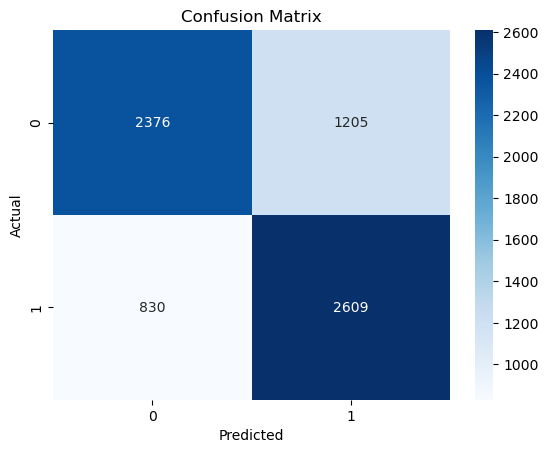

In [11]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
rf_clf.feature_importances_

array([0.35234422, 0.28499429, 0.13045795, 0.01859654, 0.21360699])

In [39]:
### Create a new input sample for testing
new_input = pd.DataFrame({
    'BMI': [703 * (500 / (66^2))],
    'HighBP': [1],
    'HighChol': [1],
    'Sex': [0],
    'Age': [1],
})



# Predict the output for the new input
prediction = rf_clf.predict(new_input)

# Display the prediction
print("Prediction for the new input:", prediction[0])

Prediction for the new input: 1.0
